# Baumgarte - Numerical Relativity
## Problem 3.5

Let's define useful symbols first

In [1]:
from sympy import *
init_printing(use_unicode=True)

In [4]:
rho, z, phi = symbols('\\rho, z, \\phi')
psi = Function(Symbol('\psi', real=True))
q = Function(Symbol('q', real=True))
coords = [ rho, z, phi ]

and specify general conformally flat metric:

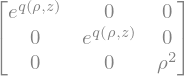

In [39]:
brill_metric = Matrix([
    [exp(q(rho, z)), 0, 0],
    [0, exp(q(rho, z)), 0],
    [ 0, 0, rho ** 2 ]
])
brill_metric

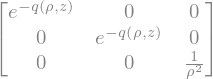

In [40]:
brill_metric.inv()

In [8]:
def compute_christoffel(metric):
    if metric.shape != (3, 3):
        raise Exception("Invalid dimensions")

    inv_metric = metric.inv()
    
    out = []
    for i in range(0, 3):
        rows = []
        for j in range(0, 3):
            row = []
            for k in range(0, 3):
                res = 0.0
                for l in range(0, 3):
                    res += inv_metric[i, l] * (
                        Derivative(metric[l, j], coords[k]) +
                        Derivative(metric[l, k], coords[j]) -
                        Derivative(metric[j, k], coords[l]))
                row.append(res / 2)
            rows.append(row)
        out.append(Matrix(rows).applyfunc(simplify))
    return out

In [9]:
def compute_ricci(christoffel):
    if len(christoffel) != 3 or christoffel[0].shape != (3, 3):
        raise Exception("Invalid dimensions")
    rows = []
    for i in range(0, 3):
        row = []
        for j in range(0, 3):
            res = 0.0
            for k in range(0, 3):
                res += Derivative(christoffel[k][i, j], coords[k])
                res -= Derivative(christoffel[k][k, j], coords[i])
                for l in range(0, 3):
                    res += christoffel[k][i, j] * christoffel[l][k, l]
                    res -= christoffel[k][i, l] * christoffel[l][j, k]
            row.append(res)
        rows.append(row)
    return Matrix(rows).applyfunc(simplify) 

In [10]:
def compute_trace(matrix_lo, inv_metric):
    return simplify(matrix_lo[0, 0] * inv_metric[0, 0] +
                    matrix_lo[1, 1] * inv_metric[1, 1] +
                    matrix_lo[2, 2] * inv_metric[2, 2])

In [41]:
brill_christoffel = compute_christoffel(brill_metric)

In [42]:
brill_ricci = compute_ricci(brill_christoffel)

In [43]:
brill_ricci_scalar = compute_trace(brill_ricci, brill_metric.inv())

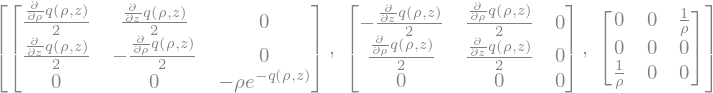

In [44]:
brill_christoffel

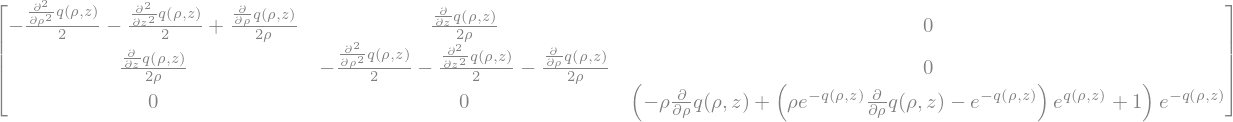

In [45]:
brill_ricci

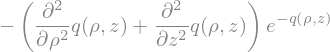

In [46]:
brill_ricci_scalar

In [17]:
# Compute covariant derivative of rank-0 tensor
def compute_diff_scalar(s, christoffel):
    if len(christoffel) != 3:
        raise Exception('Invalid dimensions')

    return Matrix([ diff(s, x) for x in coords ]).applyfunc(simplify)

# Compute covariant derivative of rank-1 covariant tensor
def compute_diff_vec_lo(t, christoffel):
    if len(t) != 3 or len(christoffel) != 3:
        raise Exception('Invalid dimensions')

    rows = []
    for i in range(0, 3):
        row = []
        for j in range(0, 3):
            res = diff(t[i], coords[j])
            for k in range(0, 3):
                res -= christoffel[k][i, j] * t[k]
            row.append(res)
        rows.append(row)
    return Matrix(rows).applyfunc(simplify)

In [57]:
dpsi = compute_diff_scalar(psi(rho, z), brill_christoffel)

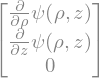

In [58]:
dpsi

In [59]:
ddpsi = compute_diff_vec_lo(dpsi, brill_christoffel)

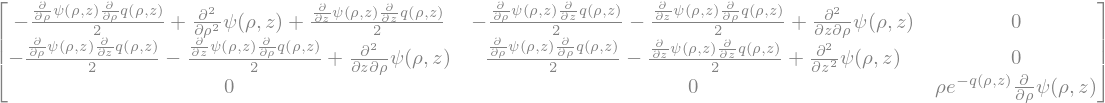

In [60]:
ddpsi

In [61]:
laplace_psi = Trace(ddpsi * brill_metric.inv()).simplify()

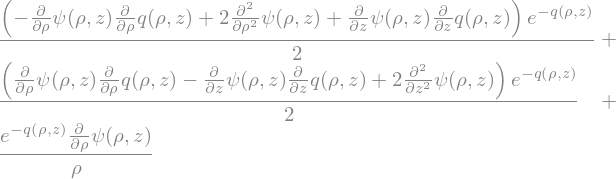

In [62]:
laplace_psi

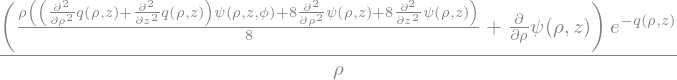

In [63]:
(laplace_psi - brill_ricci_scalar * psi(rho, z, phi) / 8).simplify()

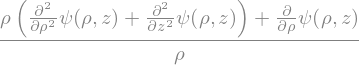

In [68]:
(laplace_psi.replace(q, lambda x, y: 1)).simplify() * exp(1)